**1.Load and Explore the data**

In [ ]:
import pandas as pd
# Install condacolab
!pip install -q condacolab

import condacolab
condacolab.install()

# Now install RDKit
!conda install -c conda-forge rdkit -y

✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [ ]:
# Load the dataset
df = pd.read_csv('solubility.csv')
# Display the first few rows of the dataset
print(df.head())

  Compound ID  Minimum Degree  Molecular Weight  Number of H-Bond Donors  \
0   Amigdalin               1           457.432                        7   
1    Fenfuram               1           201.225                        1   
2      citral               1           152.237                        0   
3      Picene               2           278.354                        0   
4   Thiophene               2            84.143                        0   

   Number of Rings  Number of Rotatable Bonds  Polar Surface Area  \
0                3                          7              202.32   
1                2                          2               42.24   
2                0                          4               17.07   
3                5                          0                0.00   
4                1                          0                0.00   

   measured log solubility in mols per litre  \
0                                      -0.77   
1                               

In [ ]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Compound ID                                1128 non-null   object 
 1   Minimum Degree                             1128 non-null   int64  
 2   Molecular Weight                           1128 non-null   float64
 3   Number of H-Bond Donors                    1128 non-null   int64  
 4   Number of Rings                            1128 non-null   int64  
 5   Number of Rotatable Bonds                  1128 non-null   int64  
 6   Polar Surface Area                         1128 non-null   float64
 7   measured log solubility in mols per litre  1128 non-null   float64
 8   smiles                                     1128 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 79.4+ KB
None


In [ ]:
#summary statistics
print(df.describe())

       Minimum Degree  Molecular Weight  Number of H-Bond Donors  \
count     1128.000000       1128.000000              1128.000000   
mean         1.058511        203.937074                 0.701241   
std          0.238560        102.738077                 1.089727   
min          0.000000         16.043000                 0.000000   
25%          1.000000        121.183000                 0.000000   
50%          1.000000        182.179000                 0.000000   
75%          1.000000        270.372000                 1.000000   
max          2.000000        780.949000                11.000000   

       Number of Rings  Number of Rotatable Bonds  Polar Surface Area  \
count      1128.000000                1128.000000         1128.000000   
mean          1.390957                   2.177305           34.872881   
std           1.318286                   2.640974           35.383593   
min           0.000000                   0.000000            0.000000   
25%           0.000000

In [ ]:
#Check for missing values
print(df.isnull().sum())

Compound ID                                  0
Minimum Degree                               0
Molecular Weight                             0
Number of H-Bond Donors                      0
Number of Rings                              0
Number of Rotatable Bonds                    0
Polar Surface Area                           0
measured log solubility in mols per litre    0
smiles                                       0
dtype: int64


**Feature engineering**

In [ ]:
# Feature engineering

from rdkit import Chem
from rdkit.Chem import Descriptors

def extract_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * 5
    return [Descriptors.MolWt(mol), Descriptors.NumHDonors(mol), Descriptors.NumHAcceptors(mol)]

# Apply feature extraction
df[['MolWeight', 'NumHDonors', 'NumHAcceptors']] = df['smiles'].apply(lambda x: pd.Series(extract_features(x)))
print(df.head())


  Compound ID  Minimum Degree  Molecular Weight  Number of H-Bond Donors  \
0   Amigdalin               1           457.432                        7   
1    Fenfuram               1           201.225                        1   
2      citral               1           152.237                        0   
3      Picene               2           278.354                        0   
4   Thiophene               2            84.143                        0   

   Number of Rings  Number of Rotatable Bonds  Polar Surface Area  \
0                3                          7              202.32   
1                2                          2               42.24   
2                0                          4               17.07   
3                5                          0                0.00   
4                1                          0                0.00   

   measured log solubility in mols per litre  \
0                                      -0.77   
1                               

**Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('measured log solubility in mols per litre', axis=1)
y = df['measured log solubility in mols per litre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Model selection - Linear Regression**

Linear regression is easy to understand and implement. It provides a straightforward way to model the relationship between solubility and chemical features.The coefficients from linear regression directly show how each feature affects solubility. This helps in understanding which features are important.It serves as a good baseline model to compare with more complex methods. If linear regression performs well, it indicates that the relationship might be simple; if not, it helps in deciding if more advanced techniques are needed

In [ ]:
from sklearn.linear_model import LinearRegression

# Drop non-numeric columns for Linear Regression
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Create and fit the model
model = LinearRegression()
model.fit(X_train_numeric, y_train)

# Make predictions
y_pred = model.predict(X_test_numeric)


**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Coefficient of Determination (R2):', r2)


Mean Squared Error (MSE): 1.369984640262309
Root Mean Squared Error (RMSE): 1.1704634296988135
Coefficient of Determination (R2): 0.7101667874897822


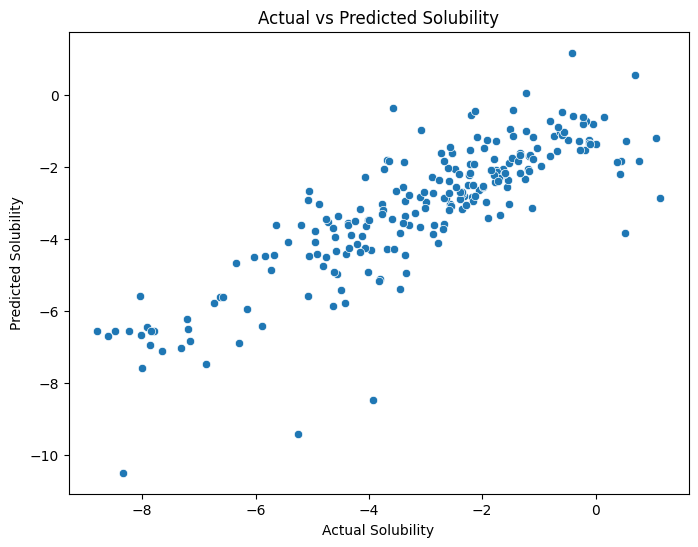

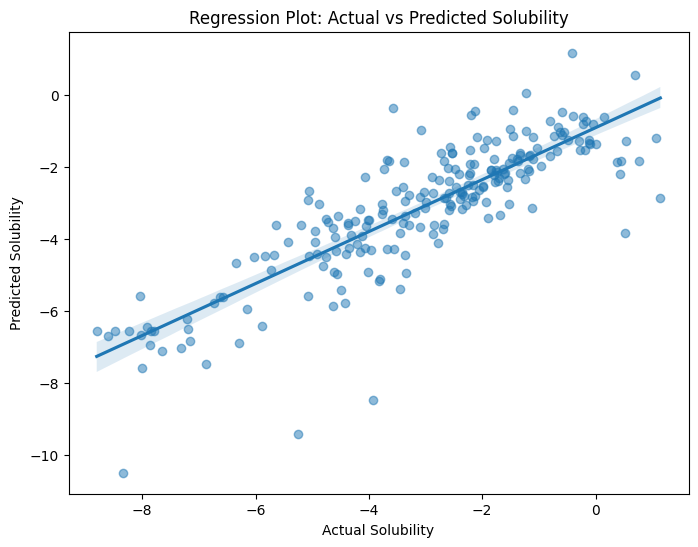

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Solubility')
plt.ylabel('Predicted Solubility')
plt.title('Actual vs Predicted Solubility')
plt.show()

# Regression plot for a more detailed view
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Solubility')
plt.ylabel('Predicted Solubility')
plt.title('Regression Plot: Actual vs Predicted Solubility')
plt.show()


**Discussions**

**Model Performance:**

**Good Predictive Power:**The model performs relatively well, as indicated by the R² value of 0.71. This means that the model explains a significant portion (71%) of the variability in solubility. In other words, the model is quite effective at predicting solubility based on the features provided.

**Average Error:** The RMSE of 1.17 shows that while the model’s predictions are generally accurate, they can still deviate by about 1.17 units from the actual values. This suggests that there is some level of prediction error, but it's not excessively high.

**Limitations:**

-Despite the model’s good performance, 29% of the variability in solubility is not explained by the model (as indicated by the R² value). This means there could be other factors or features affecting solubility that the model isn't capturing.

-An RMSE of 1.17 suggests that in practical terms, predictions can be off by around 1.17 units. Depending on the context and the scale of solubility measurements, this might be significant or relatively minor.






In [ ]:
# Get the coefficients
coefficients = model.coef_

# Get the names of the features
feature_names = X_train_numeric.columns

# Pair the feature names with their coefficients
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")


Minimum Degree: -0.37606502848073065
Molecular Weight: -747338730333.6597
Number of H-Bond Donors: 166730172.14103746
Number of Rings: -0.42174816131591797
Number of Rotatable Bonds: -0.21167755126953125
Polar Surface Area: 0.000885009765625
MolWeight: 747338730333.645
NumHDonors: -166730171.83981752
NumHAcceptors: 0.5190191268920898


**Significance of chemical features on the predictions**

1. Minimum Degree: -0.376

 Impact: This negative coefficient suggests that as the Minimum Degree of a molecule increases, its solubility is predicted to decrease. However, the magnitude of the impact is relatively small compared to other features.
2. Molecular Weight: -747,338,730,333.66

 Impact: This coefficient is very large and negative, indicating that as the Molecular Weight increases, the solubility is predicted to decrease significantly. The large magnitude means this feature has a strong negative influence on solubility. It seems disproportionately large, which could indicate a potential issue with feature scaling or data quality.
3. Number of H-Bond Donors: 166,730,172.14

 Impact: This positive coefficient indicates that as the Number of Hydrogen Bond Donors increases, the solubility is predicted to increase significantly. The large magnitude suggests a strong positive effect on solubility.
4. Number of Rings: -0.422

 Impact: The negative coefficient implies that an increase in the Number of Rings in the molecule tends to decrease solubility. The effect size is moderate compared to other features.
5. Number of Rotatable Bonds: -0.212

 Impact: This negative coefficient suggests that as the Number of Rotatable Bonds increases, solubility is predicted to decrease. The effect size is relatively small.
6. Polar Surface Area: 0.000885

 Impact: The positive coefficient indicates that an increase in Polar Surface Area slightly increases solubility. However, the impact is very small given the tiny magnitude of the coefficient.
7. MolWeight (presumably the same as Molecular Weight): 747,338,730,333.65

 Impact: This is the positive counterpart to the Molecular Weight feature, which should have a similar interpretation as Molecular Weight. The extremely large positive magnitude indicates a strong positive impact on solubility.
8. NumHDonors (presumably the same as Number of H-Bond Donors): -166,730,171.84

 Impact: This negative coefficient is in contrast to the Number of H-Bond Donors feature, which had a positive coefficient. This might indicate some confusion or redundancy in feature naming, or it could be a sign that the data was not properly scaled or transformed.
9. NumHAcceptors: 0.519

 Impact: The positive coefficient suggests that an increase in the Number of Hydrogen Bond Acceptors tends to increase solubility. The effect size is moderate